In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
IDLE = 3.6

names = ['#Busy', '#Threads', 'Runtime (s)', 'Usertime (s)', 'Energy (J)']
df = pd.read_csv('data/cn128_1000_2.csv', names=names, usecols=[0, 1, 3, 4, 5])

df['Energy (J) w/ idle'] = df['Energy (J)']
df['Energy (J)'] -= df['Runtime (s)'] * IDLE

#user_max = df['Runtime (s)'] * df['#Threads']
#user_pct = df['Usertime (s)'] / user_max
#user_pct = user_pct.clip(upper=1.0)
#df['Usertime (s)'] /= df['#Threads']
#df['%User'] = user_pct

df

,#Busy,#Threads,Runtime (s),Usertime (s),Energy (J),Energy (J) w/ idle
0,0,1,1.718980,1.718863,19.384904,25.573234
1,0,2,0.866933,1.733278,13.222874,16.343834
2,0,3,0.585755,1.756625,10.967728,13.076446
3,0,4,0.454601,1.817754,10.297131,11.933693
4,0,5,0.354075,1.768838,9.510446,10.785114
...,...,...,...,...,...,...
139,16,12,1.077361,7.367486,42.000679,45.879177
140,16,13,1.011984,7.061413,39.633461,43.276602
141,16,14,0.973991,7.215014,38.349169,41.855537
142,16,15,0.898871,7.041880,35.743778,38.979714


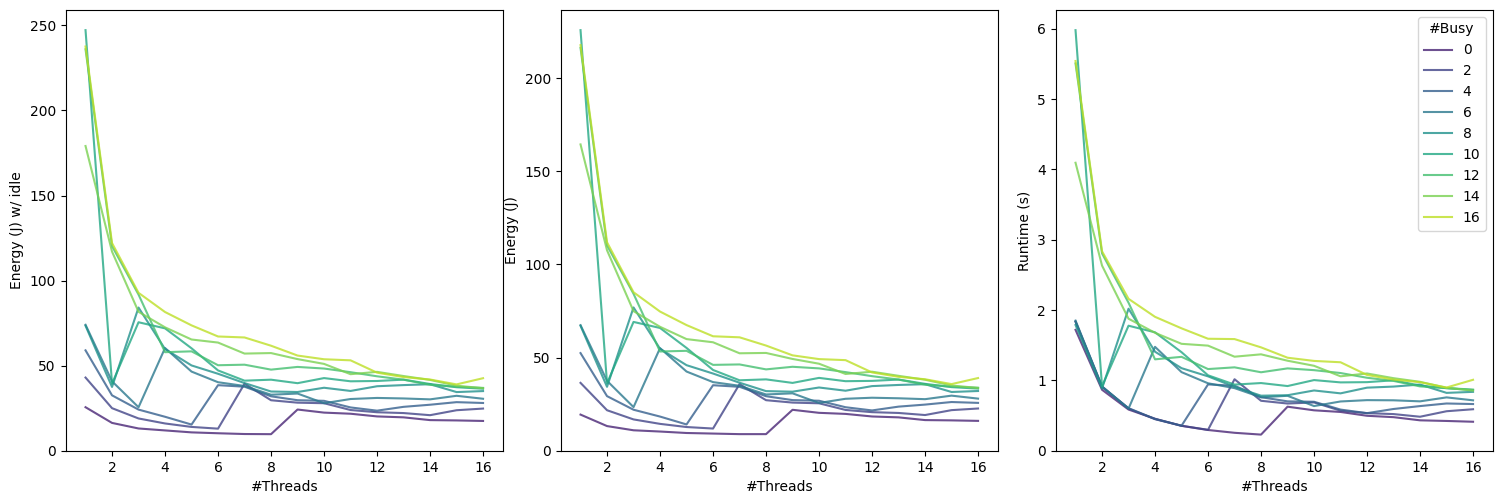

In [36]:
fig, (ax_idle, ax_energy, ax_runtime) = plt.subplots(1, 3, figsize=(15,5))
fig.tight_layout()

hue = df['#Busy'].astype('category')

# Energy
sns.lineplot(df, x='#Threads', y='Energy (J) w/ idle', hue=hue, palette='viridis', alpha=0.8, ax=ax_idle, legend=False)
ax_idle.set_ylim((0, None))

# Energy
sns.lineplot(df, x='#Threads', y='Energy (J)', hue=hue, palette='viridis', alpha=0.8, ax=ax_energy, legend=False)
ax_energy.set_ylim((0, None))

# Runtime
sns.lineplot(df, x='#Threads', y='Runtime (s)', hue=hue, palette='viridis', alpha=0.8, ax=ax_runtime)
ax_runtime.set_ylim((0, None))

plt.show()

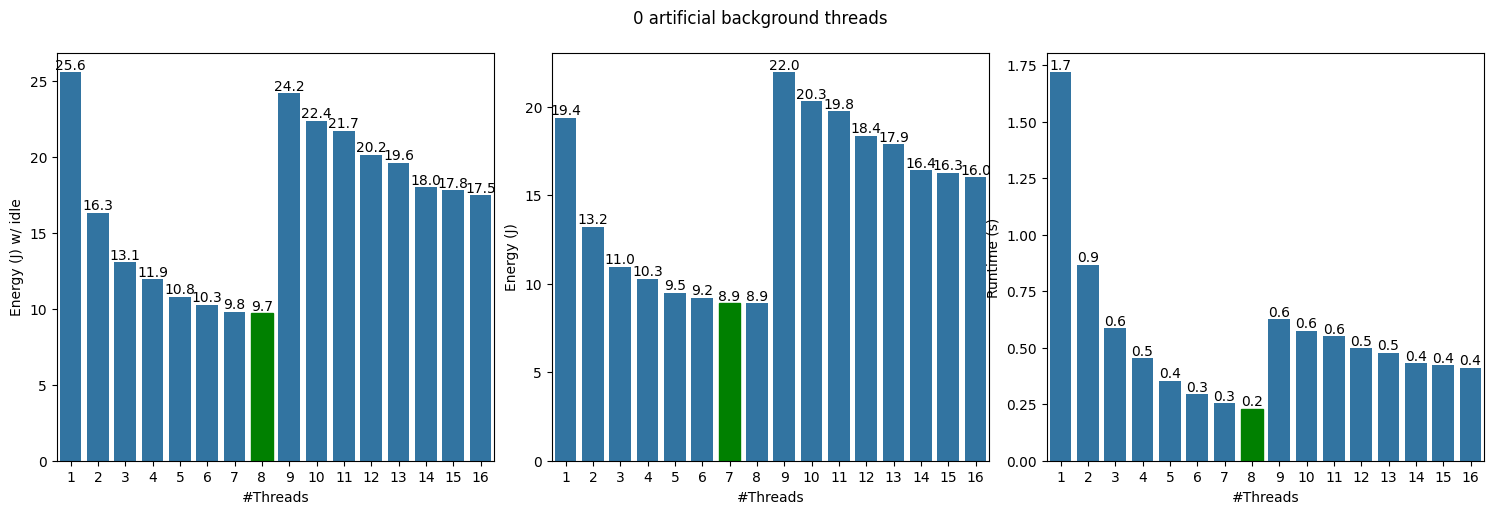

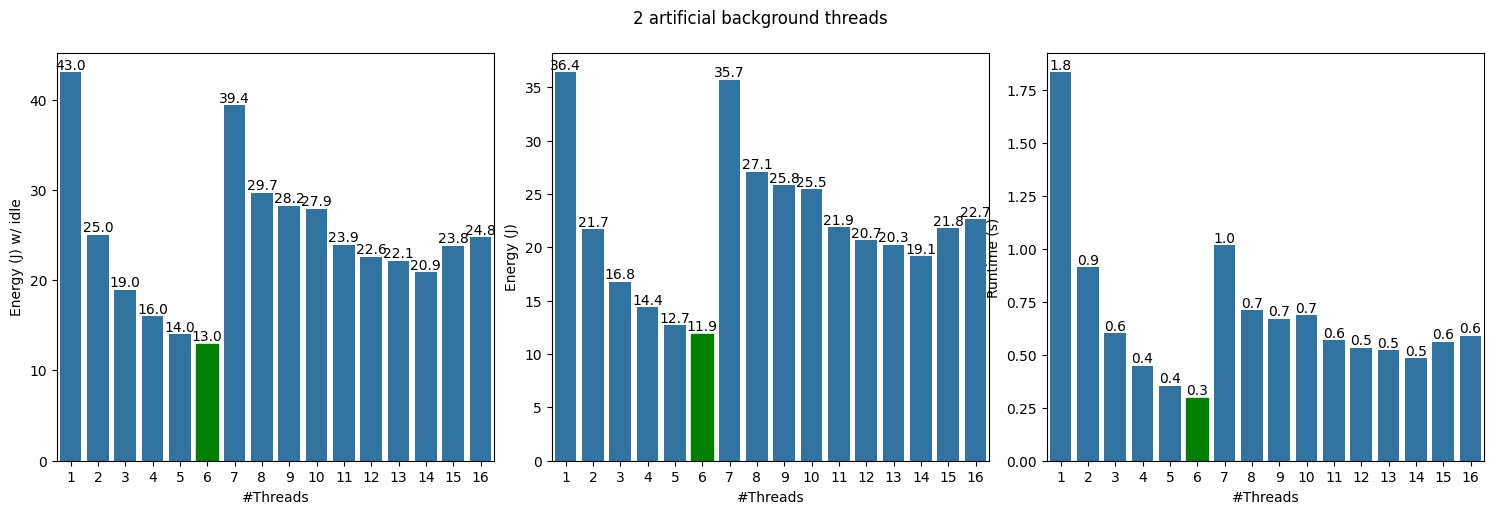

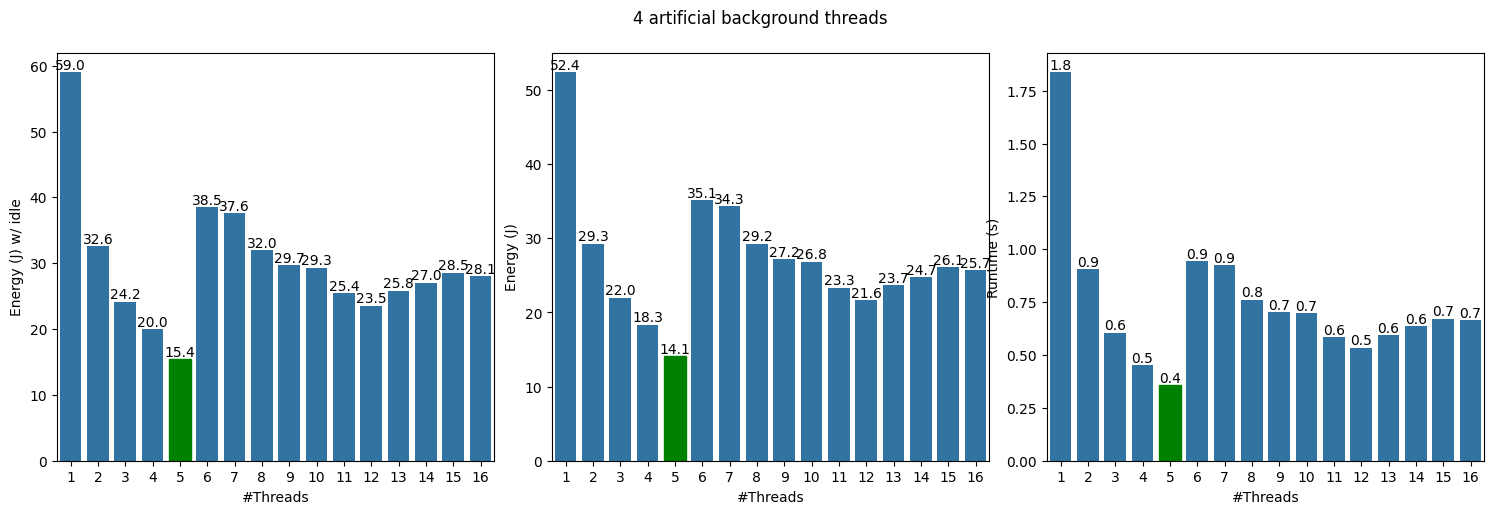

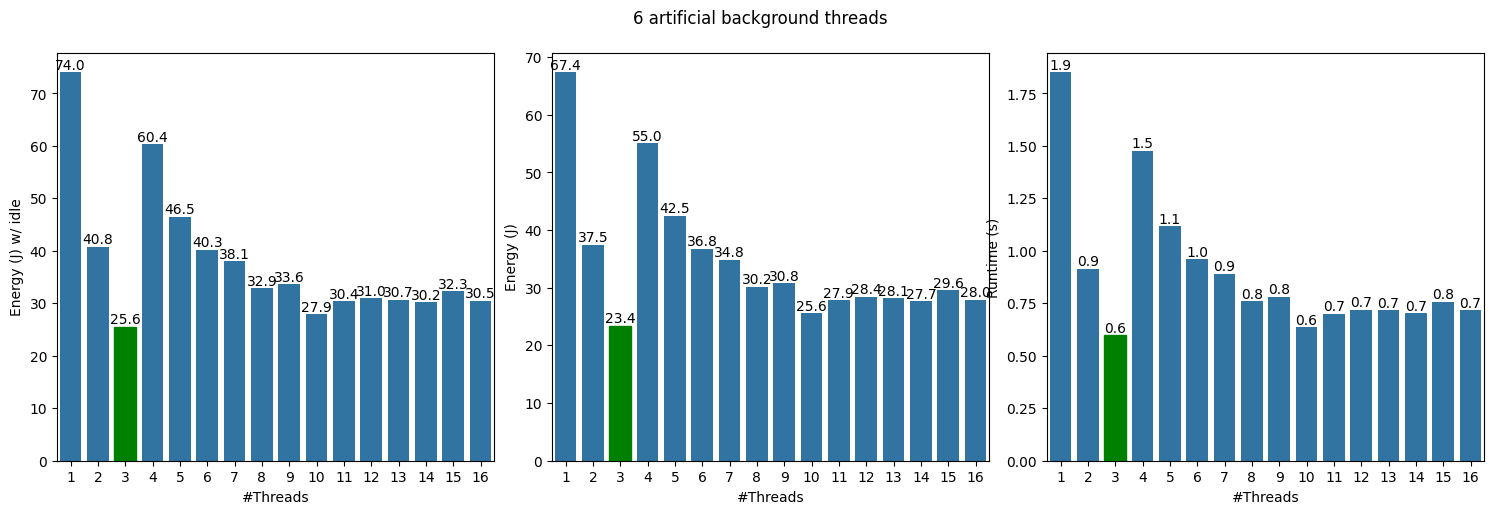

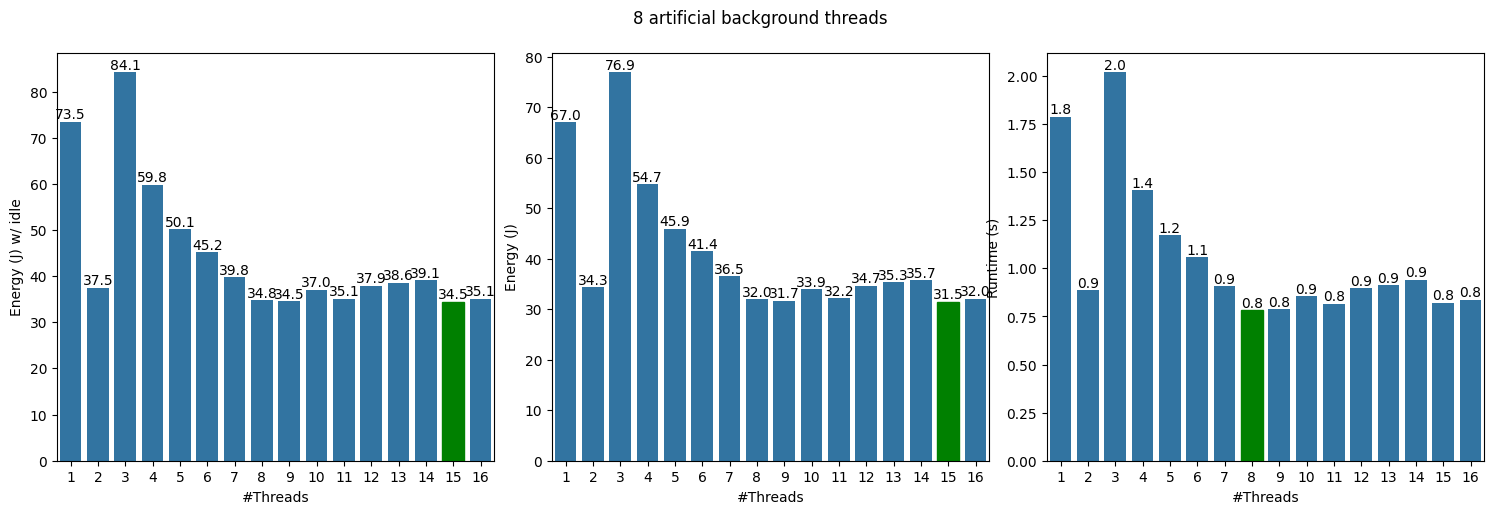

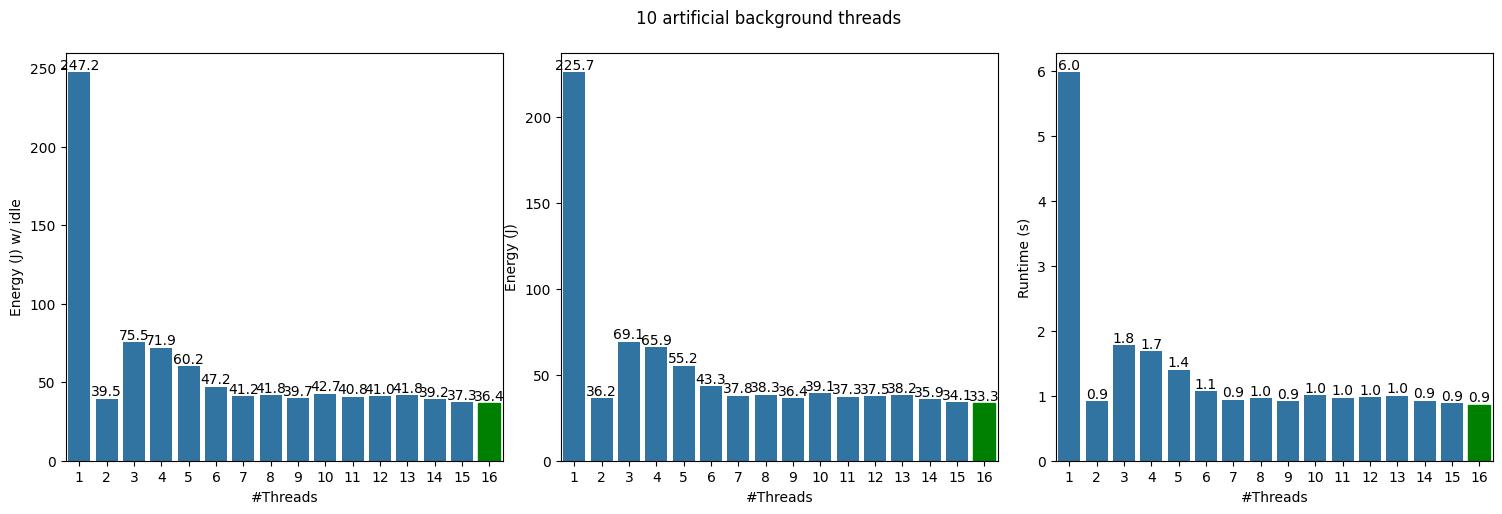

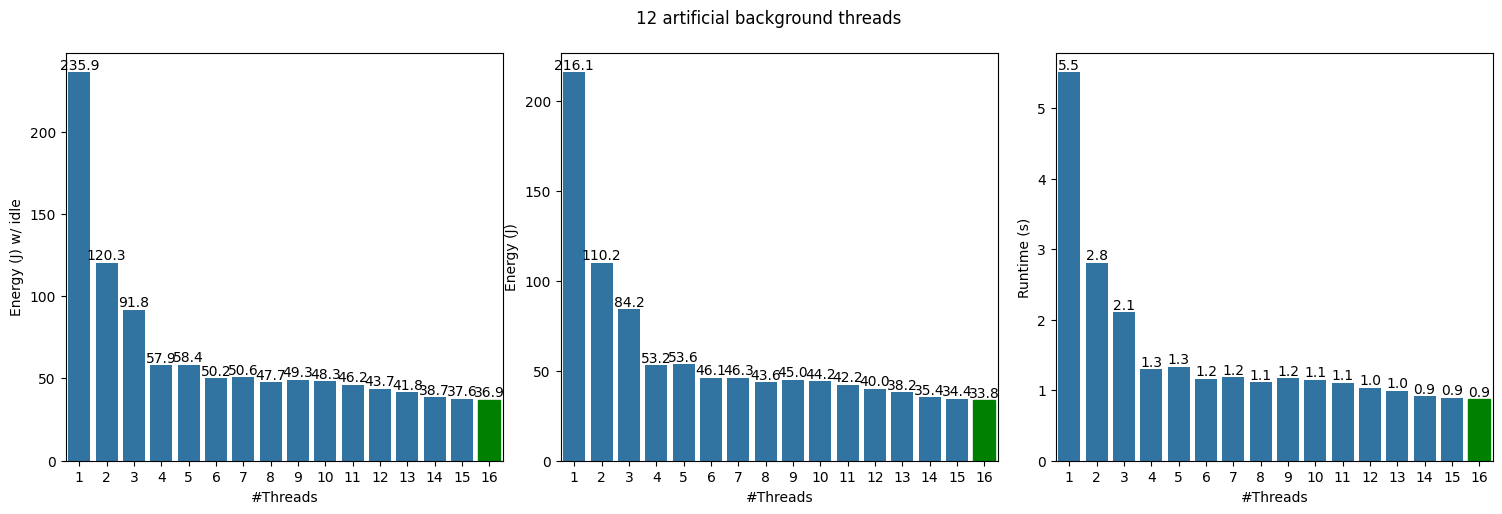

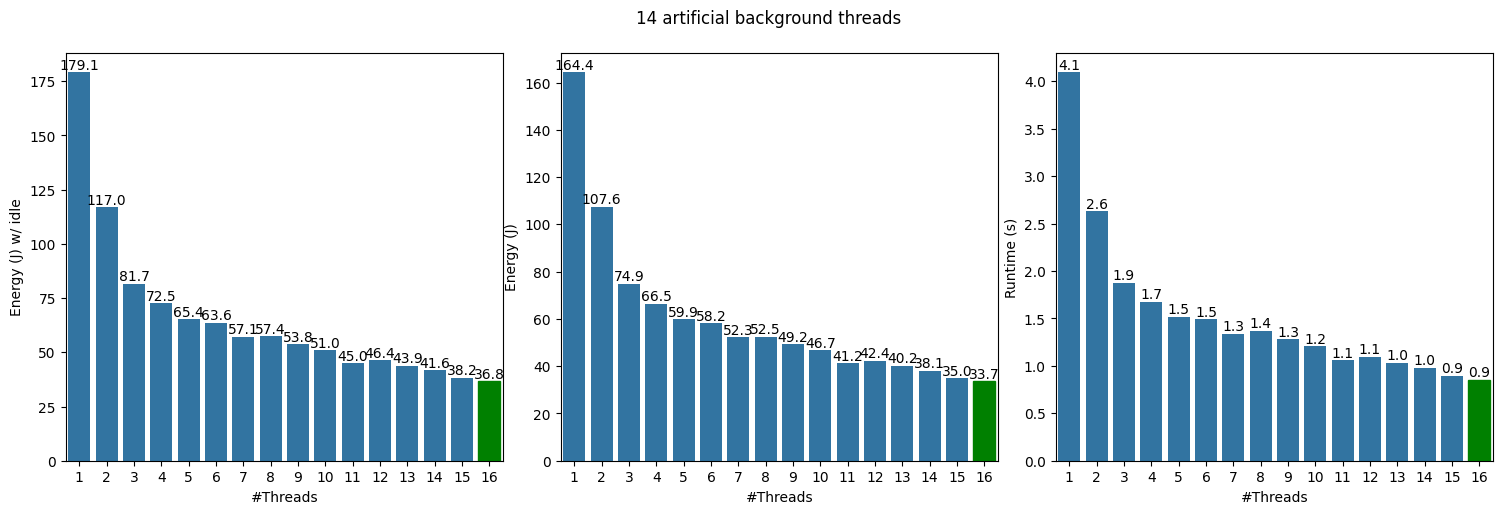

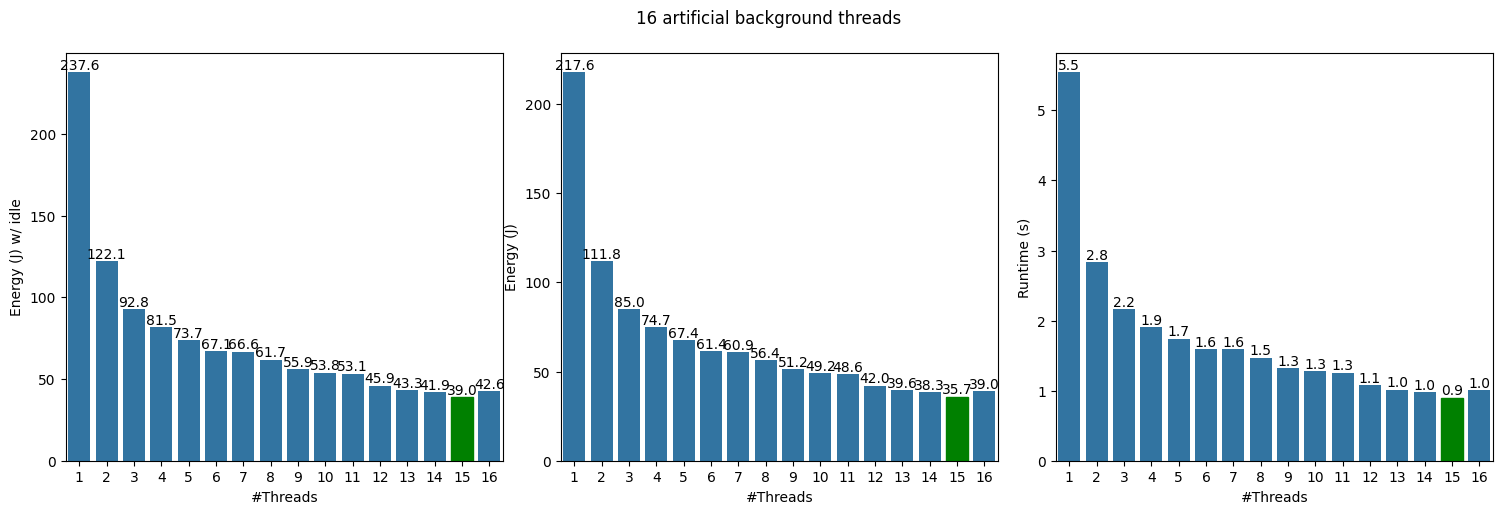

In [37]:
for busy in df['#Busy'].unique():
    dfx = df[df['#Busy'] == busy]
    
    fig, (ax_idle, ax_energy, ax_runtime) = plt.subplots(1, 3, figsize=(15,5))
    fig.suptitle(f'{busy} artificial background threads')
    fig.tight_layout()

    sns.barplot(dfx, x='#Threads', y='Energy (J) w/ idle', ax=ax_idle)
    sns.barplot(dfx, x='#Threads', y='Energy (J)', ax=ax_energy)
    sns.barplot(dfx, x='#Threads', y='Runtime (s)', ax=ax_runtime)
    
    def color_best(ax, col):
        ax.bar_label(ax.containers[0], fmt='%.1f')
        for bar in ax.patches:
            if bar.get_height() == dfx[col].min():
                bar.set_color('g')
                return
    color_best(ax_idle, 'Energy (J) w/ idle')
    color_best(ax_energy, 'Energy (J)')
    color_best(ax_runtime, 'Runtime (s)')
    
    plt.show()

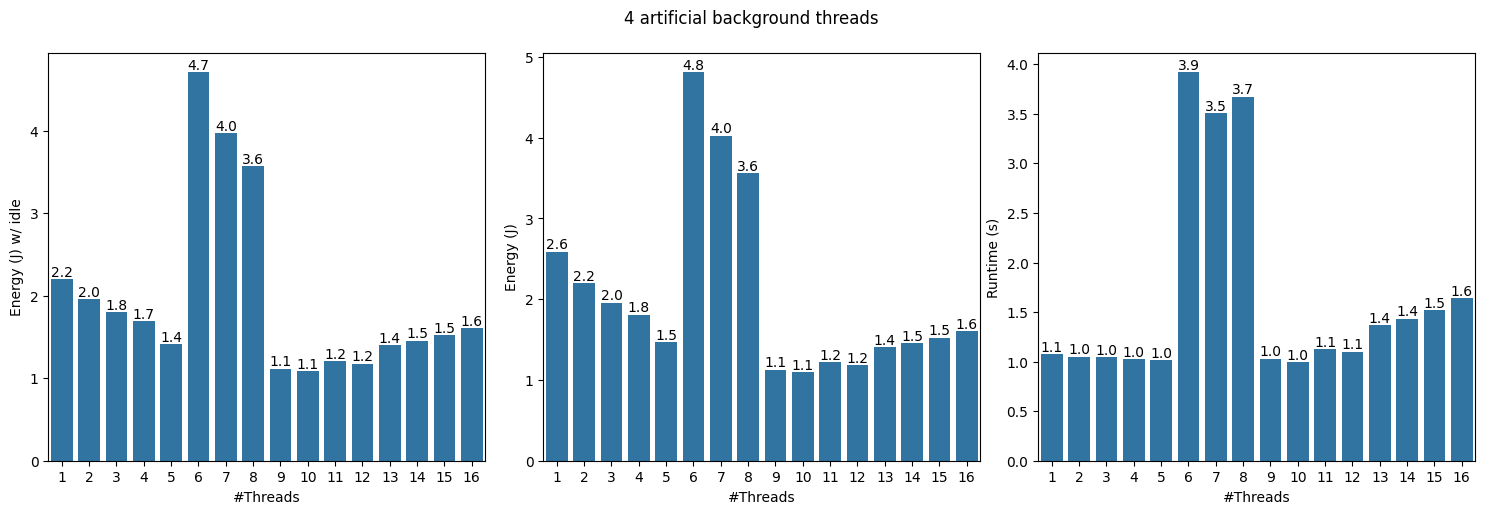

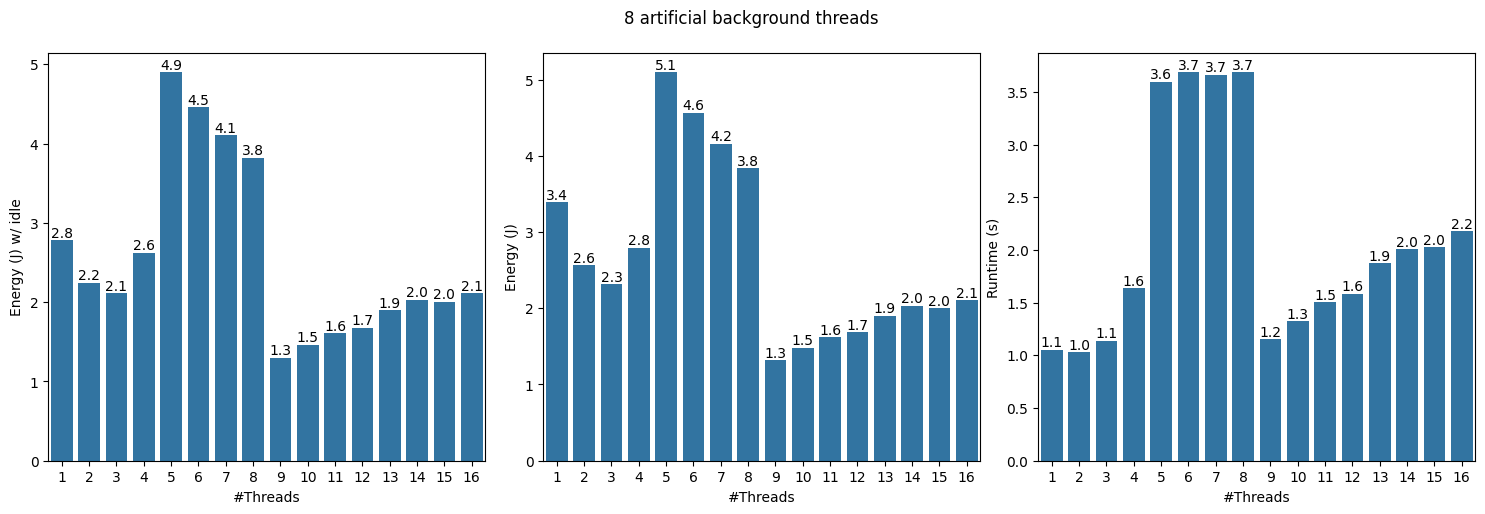

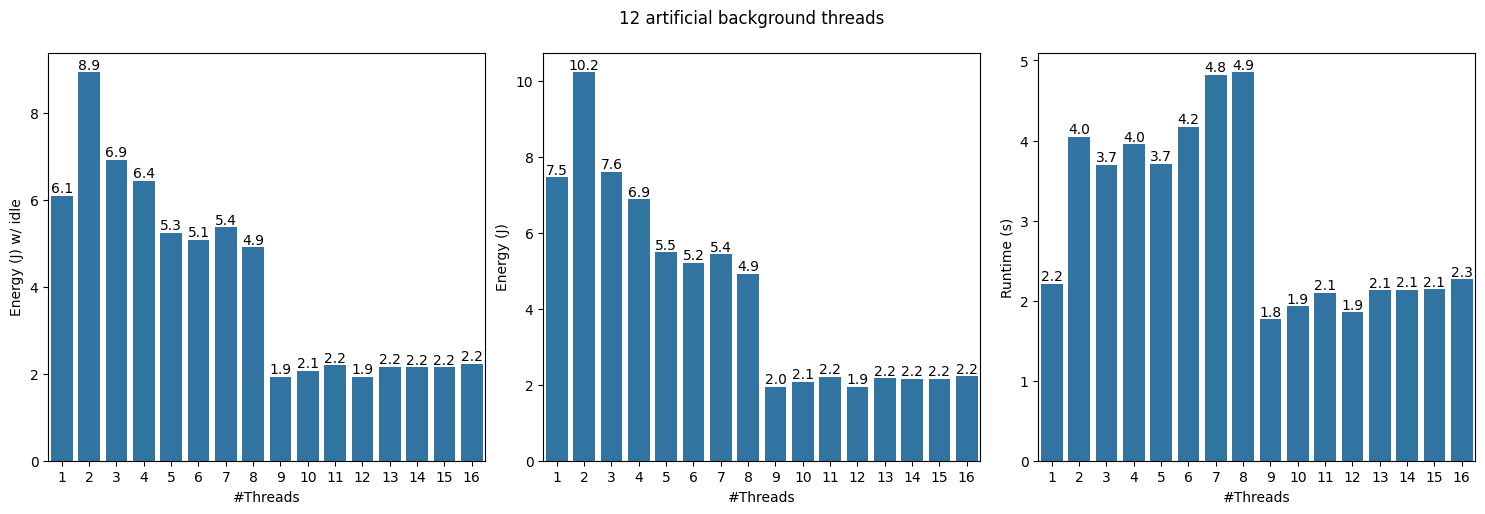

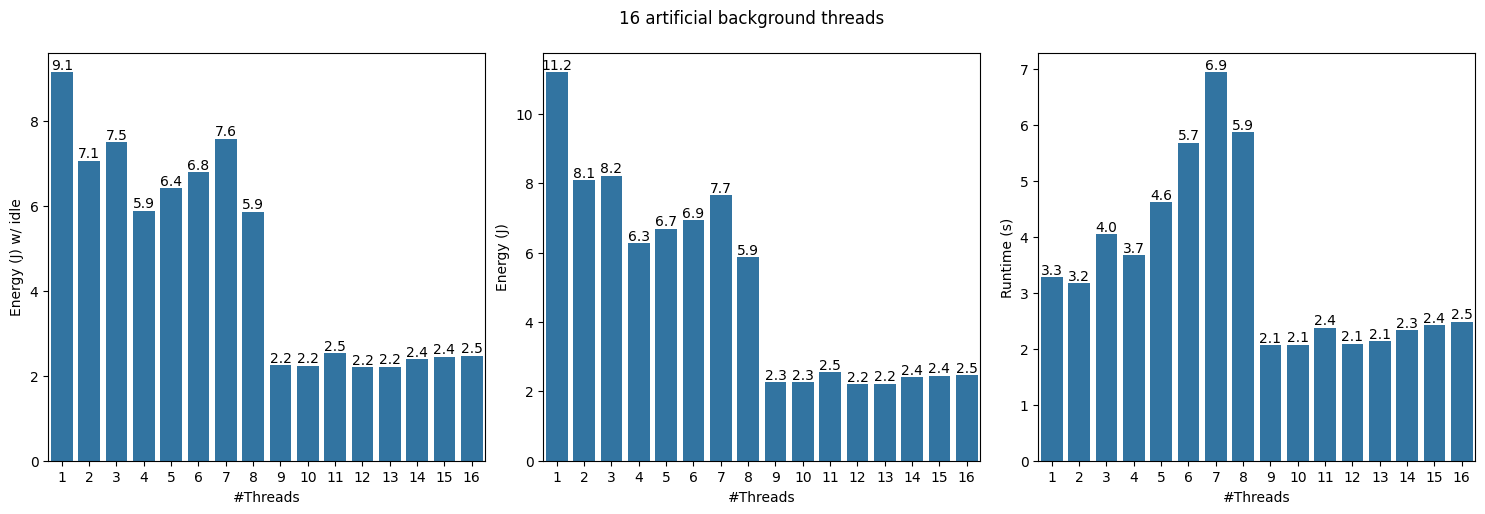

In [21]:
df0 = df.copy()
df0 = df0[df0['#Busy'] == 0]
df0.reset_index(inplace=True)

for busy in df['#Busy'].unique():
    if busy == 0:
        continue
        
    dfx = df[df['#Busy'] == busy]
    dfx = dfx.reset_index()
    
    fig, (ax_idle, ax_energy, ax_runtime) = plt.subplots(1, 3, figsize=(15,5))
    fig.suptitle(f'{busy} artificial background threads')
    fig.tight_layout()

    y = dfx['Energy (J) w/ idle'] / df0['Energy (J) w/ idle']
    sns.barplot(dfx, x='#Threads', y=y, ax=ax_idle)
    y = dfx['Energy (J)'] / df0['Energy (J)']
    sns.barplot(dfx, x='#Threads', y=y, ax=ax_energy)
    y = dfx['Runtime (s)'] / df0['Runtime (s)']
    sns.barplot(dfx, x='#Threads', y=y, ax=ax_runtime)
    
    ax_idle.bar_label(ax_idle.containers[0], fmt='%.1f')
    ax_energy.bar_label(ax_energy.containers[0], fmt='%.1f')
    ax_runtime.bar_label(ax_runtime.containers[0], fmt='%.1f')
    
    plt.show()

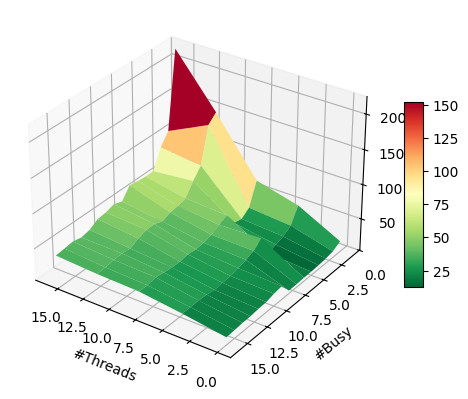

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np

y1 = np.linspace(df['#Threads'].min(), df['#Threads'].max(), len(df['#Threads'].unique()))
x1 = np.linspace(df['#Busy'].min(), df['#Busy'].max(), len(df['#Busy'].unique()))

x2, y2 = np.meshgrid(x1, y1)

z2 = griddata((df['#Busy'], df['#Threads']), df['Energy (J)'], (x2, y2))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x2, y2, z2, cmap='RdYlGn_r')

fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel('#Threads')
ax.set_ylabel('#Busy')

ax.view_init(30, 125)

plt.show()

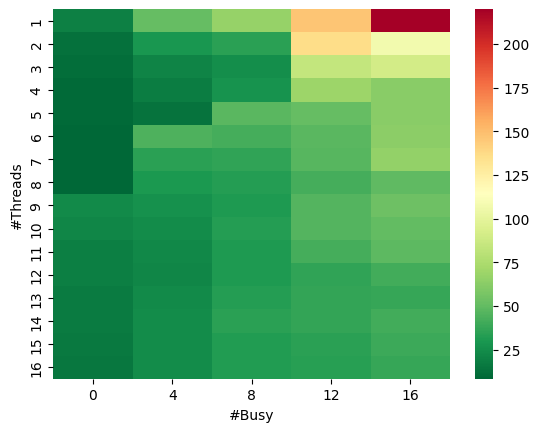

In [23]:
hm = df.pivot(index='#Threads', columns='#Busy', values='Energy (J)')
ax = sns.heatmap(hm, cmap='RdYlGn_r')
#ax.invert_yaxis()
plt.show()